In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

In [12]:
task = 6
model = 'dandelin-vilt-b32-mlm-mattn_score_0.8486'

In [13]:
gold_df = pd.read_json(f'task{task}_val_hard_gold.json')[['id', 'value']]
pred_df = pd.read_json(f'Task {task} Results/{model}_val_hard.json')[['id', 'value']]

In [14]:
mlb = MultiLabelBinarizer()

In [15]:
merged = pd.merge(pred_df, gold_df, how='inner', on='id')
merged

,id,value_x,value_y
0,110002,"[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINANCE]","[IDEOLOGICAL-INEQUALITY, MISOGYNY-NON-SEXUAL-V..."
1,110005,"[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINANCE]",[NO]
2,110012,"[STEREOTYPING-DOMINANCE, OBJECTIFICATION]","[SEXUAL-VIOLENCE, MISOGYNY-NON-SEXUAL-VIOLENCE]"
3,110017,"[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINANCE]","[STEREOTYPING-DOMINANCE, MISOGYNY-NON-SEXUAL-V..."
4,110020,"[IDEOLOGICAL-INEQUALITY, STEREOTYPING-DOMINANC...","[IDEOLOGICAL-INEQUALITY, MISOGYNY-NON-SEXUAL-V..."
...,...,...,...
480,211961,"[STEREOTYPING-DOMINANCE, OBJECTIFICATION]","[MISOGYNY-NON-SEXUAL-VIOLENCE, IDEOLOGICAL-INE..."
481,211978,[STEREOTYPING-DOMINANCE],"[OBJECTIFICATION, SEXUAL-VIOLENCE]"
482,211979,[STEREOTYPING-DOMINANCE],[STEREOTYPING-DOMINANCE]
483,211993,"[STEREOTYPING-DOMINANCE, OBJECTIFICATION]",[NO]


In [16]:
y_true = mlb.fit_transform(merged['value_y'])
y_pred = mlb.transform(merged['value_x'])

In [17]:
classes = mlb.classes_

In [18]:
ml_conf_matrix = multilabel_confusion_matrix(y_true, y_pred)

In [19]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

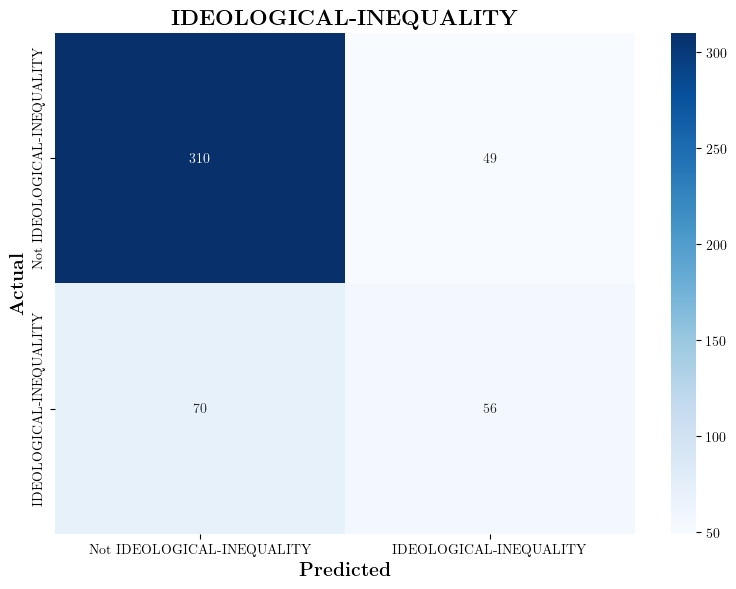

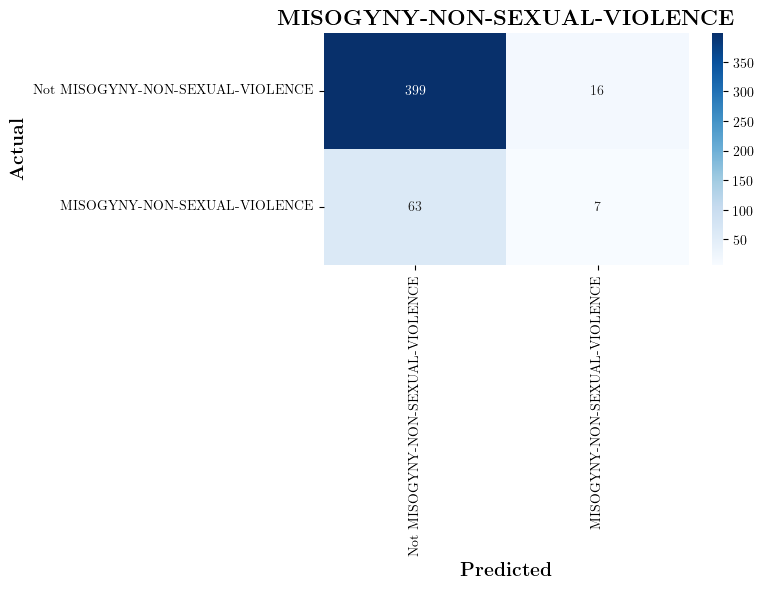

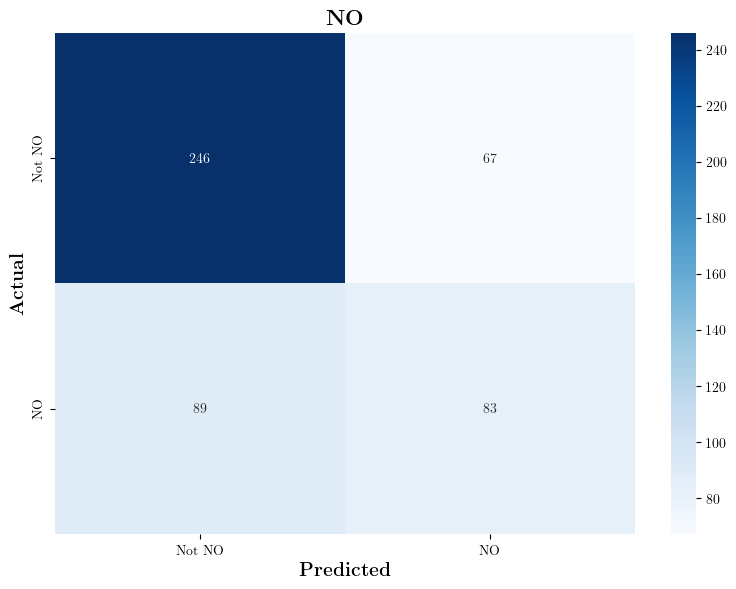

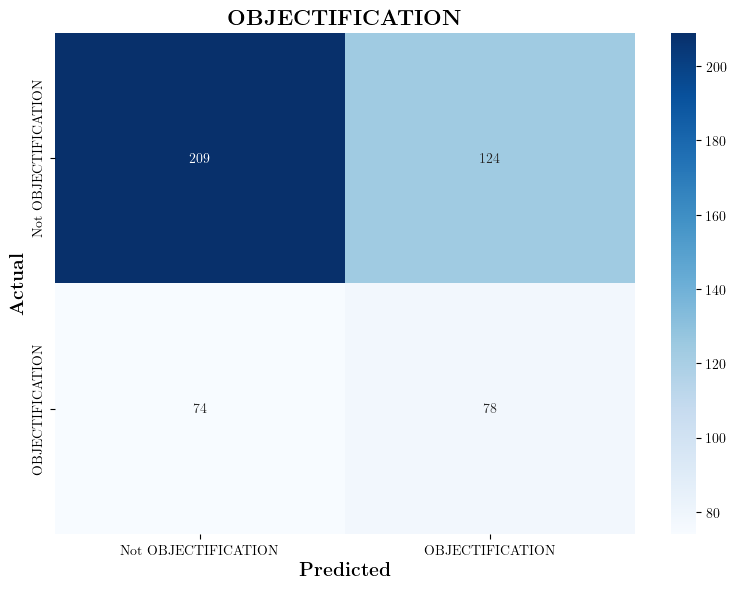

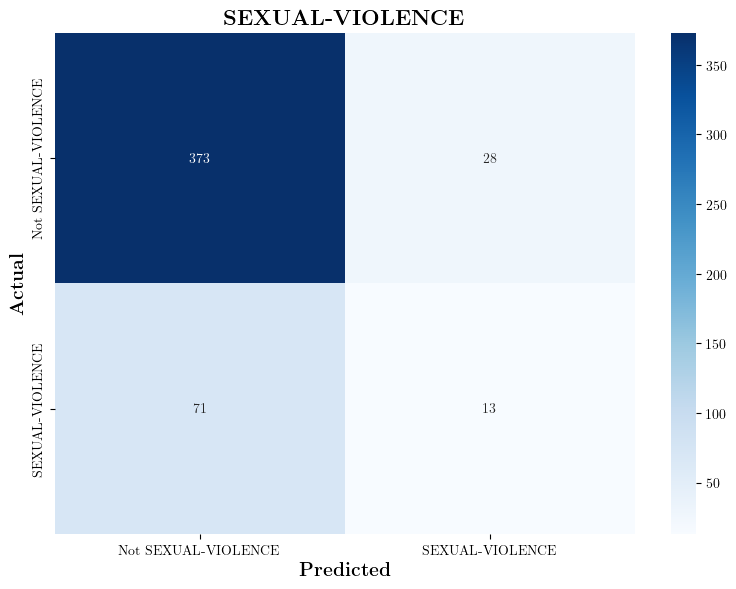

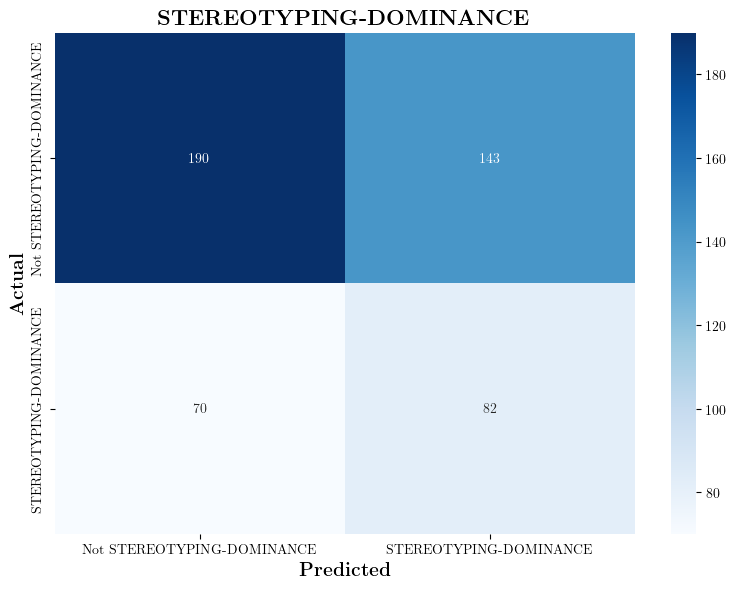

In [20]:
for i, label in enumerate(classes):
    conf_matrix = ml_conf_matrix[i]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not ' + label, label], 
                yticklabels=['Not ' + label, label])
    
    plt.xlabel(r'\textbf{Predicted}', fontsize=14)
    plt.ylabel(r'\textbf{Actual}', fontsize=14)
    plt.title(rf'\textbf{{{label}}}', fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot to a PDF file
    plt.savefig(f'task_{task}_{model}_confusion_matrix_{label}.pdf', format='pdf')

In [23]:
import pandas as pd
import json

# Read the JSON file
with open('EXIST 2024 Lab/evaluation/golds/EXIST2024_training_task6_gold_hard.json', 'r') as file:
    train_data = json.load(file)

# Read the validation JSON file
with open('task6_val_hard_gold.json', 'r') as file:
    validation_data = json.load(file)

# Extract IDs from the validation set
validation_ids = {item['id'] for item in validation_data}

# Remove validation entries from the training data
filtered_train_data = [item for item in train_data if item['id'] not in validation_ids]

# Flatten the list of values for filtered training data
filtered_train_values = [label for item in filtered_train_data for label in item["value"]]

# Create a DataFrame for filtered training values
train_df = pd.DataFrame(filtered_train_values, columns=["label"])

# Count the occurrences of each label in the filtered training set
train_counts = train_df["label"].value_counts()

# Flatten the list of values for validation
validation_values = [label for item in validation_data for label in item["value"]]

# Create a DataFrame for validation values
validation_df = pd.DataFrame(validation_values, columns=["label"])

# Count the occurrences of each label in validation set
validation_counts = validation_df["label"].value_counts()

# Print the counts
print("Validation Counts:")
print(validation_counts)

print("\nFiltered Training Counts:")
print(train_counts)


Validation Counts:
label
NO                              271
STEREOTYPING-DOMINANCE          216
OBJECTIFICATION                 208
IDEOLOGICAL-INEQUALITY          171
SEXUAL-VIOLENCE                 111
MISOGYNY-NON-SEXUAL-VIOLENCE     90
Name: count, dtype: int64

Filtered Training Counts:
label
NO                              1111
STEREOTYPING-DOMINANCE           807
OBJECTIFICATION                  736
IDEOLOGICAL-INEQUALITY           672
SEXUAL-VIOLENCE                  372
MISOGYNY-NON-SEXUAL-VIOLENCE     307
Name: count, dtype: int64


In [29]:
import pandas as pd
import json

# Read the JSON file
with open('EXIST 2024 Lab/evaluation/golds/EXIST2024_training_task4_gold_hard.json', 'r') as file:
    train_data = json.load(file)

# Read the validation JSON file
with open('task4_val_hard_gold.json', 'r') as file:
    validation_data = json.load(file)

# Extract IDs from the validation set
validation_ids = {item['id'] for item in validation_data}

# Remove validation entries from the training data
filtered_train_data = [item for item in train_data if item['id'] not in validation_ids]

# Extract the labels from filtered training data
filtered_train_labels = [item['value'] for item in filtered_train_data]

# Extract the labels from validation data
validation_labels = [item['value'] for item in validation_data]

# Create a DataFrame for filtered training labels
train_df = pd.DataFrame(filtered_train_labels, columns=["label"])

# Create a DataFrame for validation labels
validation_df = pd.DataFrame(validation_labels, columns=["label"])

# Count the occurrences of each label in the filtered training set
train_counts = train_df["label"].value_counts()

# Count the occurrences of each label in the validation set
validation_counts = validation_df["label"].value_counts()

# Print the counts
print("Validation Counts:")
print(validation_counts)

print("\nFiltered Training Counts:")
print(train_counts)


Validation Counts:
label
YES    434
NO     271
Name: count, dtype: int64

Filtered Training Counts:
label
YES    1604
NO     1111
Name: count, dtype: int64
